# EDA Project using Python - Data Analysis - Hotel Booking Analysis

# Project Description

This is an end-to-end data analytics project for hotel booking insights where we will cover the following topics:
1) Data exploration: Explore aggregated hotel bookings data along with dimension tables for hotels, rooms etc.
2) Data cleaning and transformation: Remove erroneous values and create new columns.
3) Insights generation: Discuss a few key insights that are generated. 

# Project Summary

This EDA project on Hotel Booking Analysis investigates cancellations, and their underlying patterns; and suggests measures that can be implemented to reduce cancellations and secure revenue:

The project covers booking information for a city hotel and a resort hotel including information such as when the booking was made, length of stay, the number of adults, and children. The project went through the basic idea of the EDA and visualization process.

In this project, I will do Exploratory Data Analysis on the given dataset. The project suggests measures that can be implemented to reduce cancellations and secure revenue. For example, hotels can offer discounts or promotions to customers who book early or who book for longer stays. Hotels can also offer incentives such as free parking or free breakfast to customers who book directly with them instead of through third-party websites.

This EDA involves following steps where in first step involves exploration and inspection over raw data, and second in second step I have dealt with data impurities杂质 and cleaned the data by adding null values and dropping irrelevant data from the dataset.

This EDA is divided into following 3 analyses: 
- Univariate analysis: Univariate analysis is the simplest of the three analyses where the data, you are analyzing is only one variable.
- Bivariate analysis: Bivariate analysis is where you are comparing two variables to study their relationships.
- Multivariate analysis: Multivariate analysis is similar to Bivariate analysis but you are comparing more than two variables.

The project concludes that by analyzing hotel bookings data and understanding cancellations patterns, hotels can take steps to reduce cancellations and increase revenue.


# Problem Statement

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay to get the best daily rate? What if you wanted to predict whether a hotel was likely to receive a disproportionately不成比例 high number of special requests? This hotel booking dataset can help you explore those questions! The dataset contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Define Your Business Objective?

The project aims to gain interesting insight into customers’ behavior when booking a hotel. The demand for different segments of customers may differ and forecasting becomes harder as it may requires different model for different segment. These insights can guide hotels to adjust their customer strategies and make preparation for the unknown.

# 1. Know Your Data

Import Libraries

In [1]:
# Importing necessary libraries needed in EDA
import numpy as np
import pandas as pd
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px    # will be used for plotting

Dataset Loading

In [2]:
data=pd.read_csv(r"Hotel Bookings.csv")
#data=pd.read_csv(r"C:\Users\foon_\OneDrive\桌面\Online Tutorials\Data Analysis Portfolio Project\Capstone Project\Hotel Bookings.csv")
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
data.shape

(119390, 32)

Dataset First View

In [4]:
# Dataset First Look
data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [5]:
# Looking the last 5 rows of the dataset
data.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out              2017-09-06  
119386           Check-Out              2017-09-07  
119387           Check-Out              2017-09-07  
119388           Check-Out              2017-09-07  
119389           Check-Out              2017-09-07  

[5 rows x 32 columns]

Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Number of rows : {len(data.axes[0])}')
print(f'Number of columns : {len(data.axes[1])}')

Number of rows : 119390
Number of columns : 32


Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().sum()

31994

There are 31994 duplicate values in the dataset

In [9]:
# Dropping the duplicate values
data.drop_duplicates(inplace = True)

In [10]:
data.shape

(87396, 32)

Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


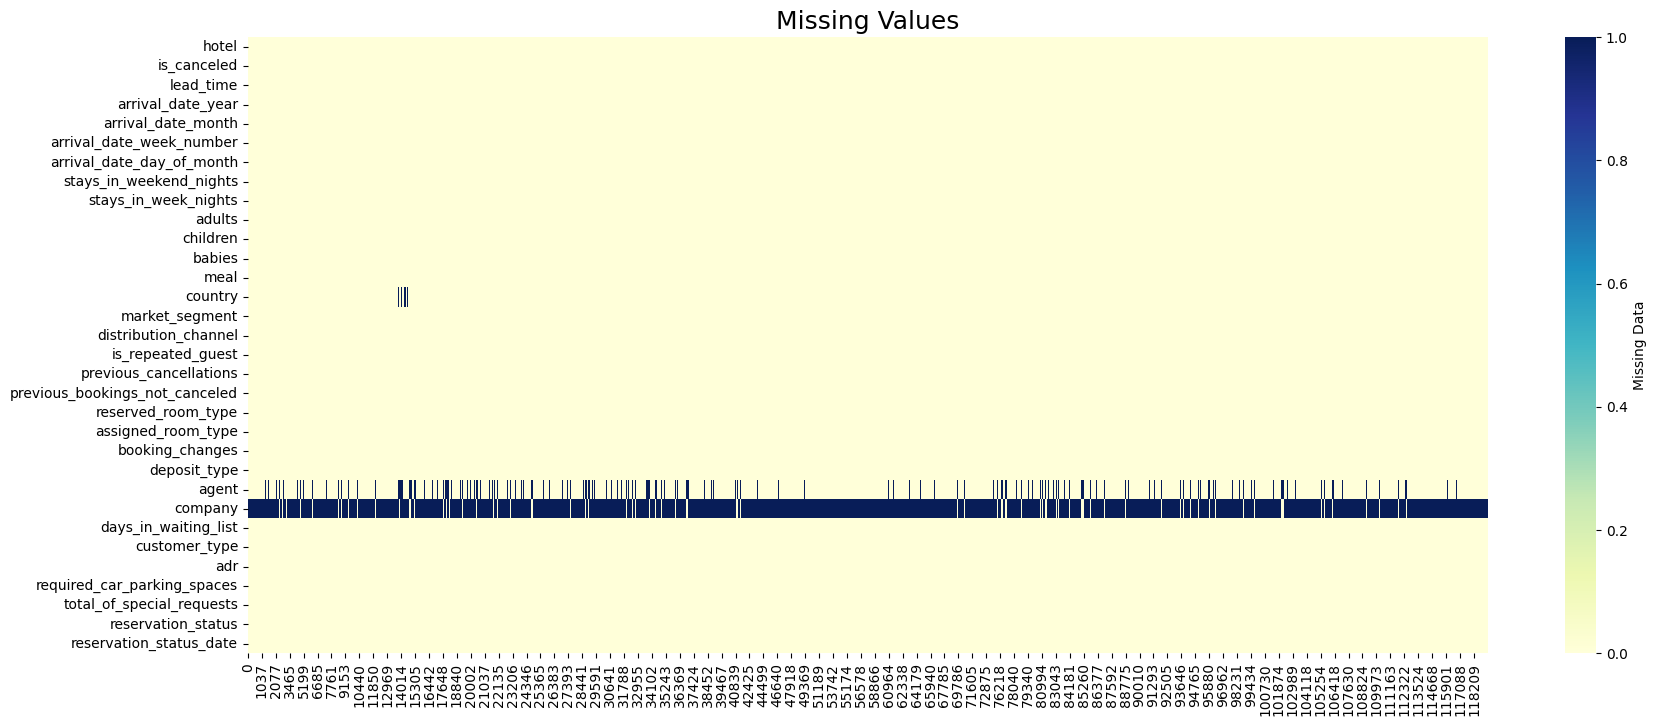

In [12]:
# Visualizing the missing values using Seaborn heatmap

plt.figure(figsize=(20, 8))
sns.heatmap(data.isna().transpose(),
           cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

plt.title('Missing Values', fontsize=18)
plt.show()

What did you know about your dataset?

We can see that there are a total of four columns with missing/null values: company, agent, country, and children.

1. In the children column, I will replace null values with 0, if the customer did not have any children.
2. The country column has null values. I will replace these null values with 'Others', assuming the customer's country was not mentioned while booking.
3. In the company and agent columns, it might be the case that customers did not book a hotel through them, so these columns might have null values. As these two columns have numeric data, I will replace them with 0.

# 2. Understanding Your Variables

In [13]:
# Dataset Columns
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
# Dataset Describe
#data.describe()
data.describe().T

count         mean         std      min  \
is_canceled                     87396.0     0.274898    0.446466     0.00   
lead_time                       87396.0    79.891368   86.052325     0.00   
arrival_date_year               87396.0  2016.210296    0.686102  2015.00   
arrival_date_week_number        87396.0    26.838334   13.674572     1.00   
arrival_date_day_of_month       87396.0    15.815541    8.835146     1.00   
stays_in_weekend_nights         87396.0     1.005263    1.031921     0.00   
stays_in_week_nights            87396.0     2.625395    2.053584     0.00   
adults                          87396.0     1.875795    0.626500     0.00   
children                        87392.0     0.138640    0.455881     0.00   
babies                          87396.0     0.010824    0.113597     0.00   
is_repeated_guest               87396.0     0.039075    0.193775     0.00   
previous_cancellations          87396.0     0.030413    0.369145     0.00   
previous_bookings_not_canceled  87396.0     0.183990    1.731894     0.00   
booking_changes                 87396.0     0.271603    0.727245     0.00   
agent                           75203.0    94.138306  113.188172     1.00   
company                          5259.0   183.081384  130.557608     6.00   
days_in_waiting_list            87396.0     0.749565   10.015731     0.00   
adr                             87396.0   106.337246   55.013953    -6.38   
required_car_parking_spaces     87396.0     0.084226    0.281533     0.00   
total_of_special_requests       87396.0     0.698567    0.831946     0.00   

                                   25%     50%     75%     max  
is_canceled                        0.0     0.0     1.0     1.0  
lead_time                         11.0    49.0   125.0   737.0  
arrival_date_year               2016.0  2016.0  2017.0  2017.0  
arrival_date_week_number          16.0    27.0    37.0    53.0  
arrival_date_day_of_month          8.0    16.0    23.0    31.0  
stays_in_weekend_nights            0.0     1.0     2.0    19.0  
stays_in_week_nights               1.0     2.0     4.0    50.0  
adults                             2.0     2.0     2.0    55.0  
children                           0.0     0.0     0.0    10.0  
babies                             0.0     0.0     0.0    10.0  
is_repeated_guest                  0.0     0.0     0.0     1.0  
previous_cancellations             0.0     0.0     0.0    26.0  
previous_bookings_not_canceled     0.0     0.0     0.0    72.0  
booking_changes                    0.0     0.0     0.0    21.0  
agent                              9.0    14.0   240.0   535.0  
company                           47.0   169.0   263.0   543.0  
days_in_waiting_list               0.0     0.0     0.0   391.0  
adr                               72.0    98.1   134.0  5400.0  
required_car_parking_spaces        0.0     0.0     0.0     8.0  
total_of_special_requests          0.0     0.0     1.0     5.0

Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
pd.Series({col:data[col].unique() for col in data})

# Creating a series consisting every column name of the dataset and it's value.
# Used for loop to iterate over every column in the dataset

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

# 3. Data Wrangling

Data Wrangling Code

In [16]:
# Creating a duplicate of the original dataset before making any changes in it
data = data.copy()

In [17]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
# Replacing null values in children column with 0 assuming that family had 0 children
# Replacing null value in company and agent columns with 0 assuming those rooms were booked without company/agent

data['children'].fillna(0, inplace = True)
data['company'].fillna(0, inplace = True)
data['agent'].fillna(0, inplace = True)

# Replacing null values in country column as 'Others'
data['country'].fillna('Others', inplace = True)

In [19]:
# Checking for null values after replacing them
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [20]:
# Dropping the 'company' column as it contains a lot of null values in comparison to other columns
data.drop(['company'], axis = 1, inplace = True)    # Dropping the values vertically at axis 1 (columns)

In [21]:
# Dropping rows where on adults, children and babies are available because no bookings were made that day
no_guest = data[data['adults']+data['babies']+data['children'] == 0]
data.drop(no_guest.index, inplace = True)

In [22]:
# Adding some new columns to make our data analysis ready
data['total_people'] = data['adults'] + data['babies'] + data['children']    # Creating total people column by adding all the people all the people in that booking

data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']    # Creating a column to check total stay by people in that booking

In [23]:
# Having a final look to check if our dataset is ready to analyse
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
0                        0                     0       2  ...    0.0   
1                        0                     0       2  ...    0.0   
2                        0                     1       1  ...    0.0   
3                        0                     1       1  ...  304.0   
4                        0                     2       2  ...  240.0   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0                           0   
1                     0     Transient   0.0                           0   
2                     0     Transient  75.0                           0   
3                     0     Transient  75.0                           0   
4                     0     Transient  98.0                           0   

  total_of_special_requests  reservation_status  reservation_status_date  \
0                         0           Check-Out               2015-07-01   
1                         0           Check-Out               2015-07-01   
2                         0           Check-Out               2015-07-02   
3                         0           Check-Out               2015-07-02   
4                         1           Check-Out               2015-07-03   

   total_people total_stay  
0           2.0          0  
1           2.0          0  
2           1.0          1  
3           1.0          1  
4           2.0          2  

[5 rows x 33 columns]

In [24]:
data.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  agent  days_in_waiting_list  \
119385                     5       2  ...  394.0                     0   
119386                     5       3  ...    9.0                     0   
119387                     5       2  ...    9.0                     0   
119388                     5       2  ...   89.0                     0   
119389                     7       2  ...    9.0                     0   

       customer_type     adr required_car_parking_spaces  \
119385     Transient   96.14                           0   
119386     Transient  225.43                           0   
119387     Transient  157.71                           0   
119388     Transient  104.40                           0   
119389     Transient  151.20                           0   

       total_of_special_requests  reservation_status  reservation_status_date  \
119385                         0           Check-Out               2017-09-06   
119386                         2           Check-Out               2017-09-07   
119387                         4           Check-Out               2017-09-07   
119388                         0           Check-Out               2017-09-07   
119389                         2           Check-Out               2017-09-07   

        total_people total_stay  
119385           2.0          7  
119386           3.0          7  
119387           2.0          7  
119388           2.0          7  
119389           2.0          9  

[5 rows x 33 columns]

In [25]:
# Checking the final shape of the dataset
print(f'Final shape of the dataset is {data.shape}')

Final shape of the dataset is (87230, 33)


We can see that we have dealt with all the null values and added some new columns and now our dataset is ready to be analysed.

What manipulations have you done and what insights have you found?

Created a copy of the dataset before doing any manipulation then filled missing values with 0 in children, company, and agent columns as those columns had numerical values, and in column country filled missing values with ‘others’. After dealing with missing values, I dropped the company column as this had 96% missing values and was of no use in our analysis. In the next step, I created two new columns named ‘total_people’ and ‘total_stay’ for further analysis. In the total people column, I added all the babies, children, and adults. Similarly in a second new column, I added the weekend stay and week stay column.

After manipulating the dataset these were the insights I found:
1. There are two types of hotels that guests could be booked into so I can find which type of hotel was booked most.
2. There are different types of guests and they come from different countries.
3. Guests can choose different foods from the menu.
4. Guests can book the hotel directly or through different available channels.
5. Guests can cancel their booking and there are repeated guests also.
6. Guests can choose rooms of their liking while booking.
7. There is a column available in the dataset named ‘adr’ which could be used to analyze a hotel’s performance based on revenue.

# 4. Data Viszualization, Storytelling & Expermienting with charts: Understand the relationships between variables

Chart - 1

Which type of hotel is most preferred by the guests?

In [26]:
# Chart - 1 visualiztion code
# Storing unique hotel names in a variable
hotel_name = data['hotel'].unique()

# Checking the number of unique booking in each hotel type
unique_booking = data.hotel.value_counts()

# Creating a donut check using plotly.express
fig1 = px.pie(names = hotel_name, values = unique_booking, hole = 0.5, color = hotel_name,
            color_discrete_map = {'Resort Hotel': 'teal', 'City Hotel': 'nude'})

# Giving it a title and updating the text info
fig1.update_traces(textinfo = 'percent + value')
fig1.update_layout(title_text = 'Hotel Booking Percentage', title_x = 0.5)

# Setting the legend at center
fig1.update_layout(legend=dict(
    orientation = 'h',
    yanchor = 'bottom',
    xanchor = 'center',
    x = 0.5
))

# Display the figure
fig1.show()

Creating a Pie chart also for the above problem statement as Donut chart is not exported to github.

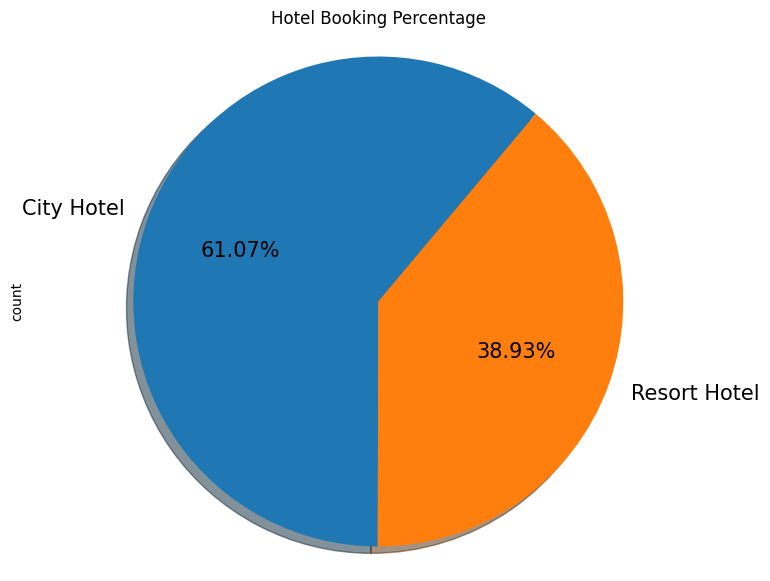

In [27]:
# Count Hotel
hotel_count = data.hotel.value_counts()

# Plotting Values in a simple pie chart
hotel_count.plot.pie(figsize=(9,7), autopct='%1.2f%%', shadow=True, fontsize=15, startangle=50)

# Setting the title
plt.title('Hotel Booking Percentage')
plt.axis('equal')
plt.show()

Chart - 2

What is percentage of hotel booking cancellation?

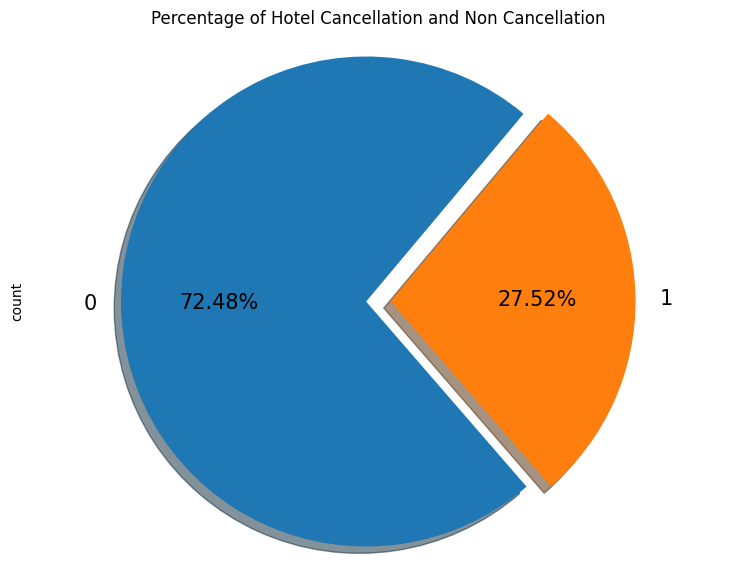

In [28]:
# Chart - 2 visualization code
# Extracting and storing unque values of hotel cancellation
cancelled_hotel = data.is_canceled.value_counts()

# Creating a pie chart
cancelled_hotel.plot.pie(figsize=(9,7), explode=(0.05,0.05), autopct='%1.2f%%', shadow=True, fontsize=15, startangle=50)

# Giving our pie chart a title
plt.title('Percentage of Hotel Cancellation and Non Cancellation')
plt.axis('equal')
plt.show()

Chart - 3

Which type of meal is most preferred by guests?

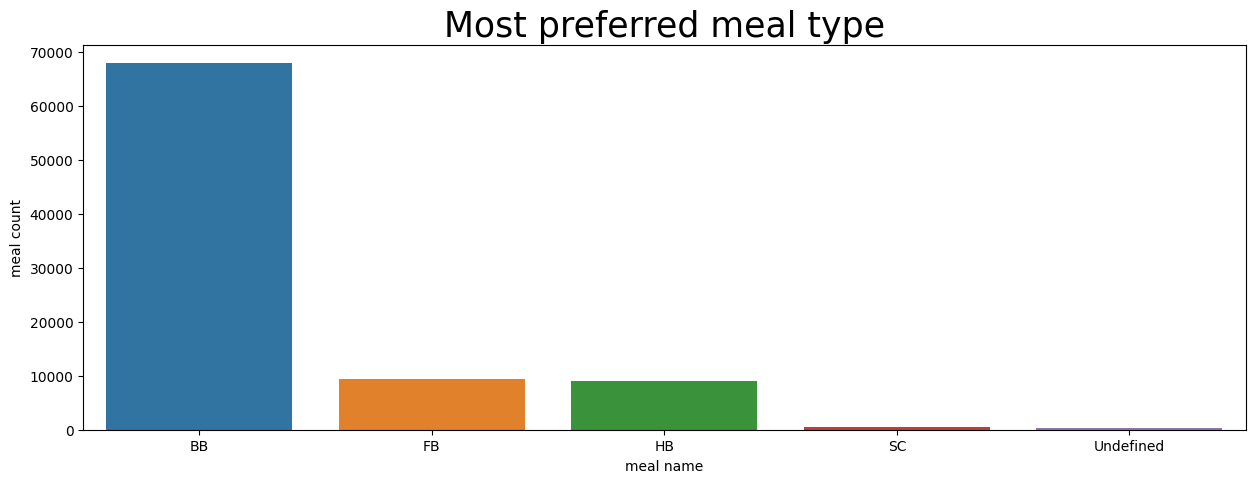

In [29]:
# Chart - 3 visualization code

# Counting each meal type
meal_count = data.meal.value_counts()

# Extracting each meal type and storing in a variable
meal_name = data['meal'].unique()

# Creating a dataset of each meal type and count
meal_df = pd.DataFrame(zip(meal_name, meal_count), columns = ['meal name', 'meal count'])

# Visualising the values on a bar chart
plt.figure(figsize=(15,5))
g = sns.barplot(data=meal_df, x='meal name', y='meal count')
g.set_xticklabels(meal_df['meal name'])
plt.title('Most preferred meal type', fontsize=25)
plt.show()

Meal type variable description:
    
- BB – (Bed and Breakfast)
- HB – (Halt Board)
- FB – (Full Board)
- SC – (Self Catering)

Chart - 4

Whch year has the most bookings?

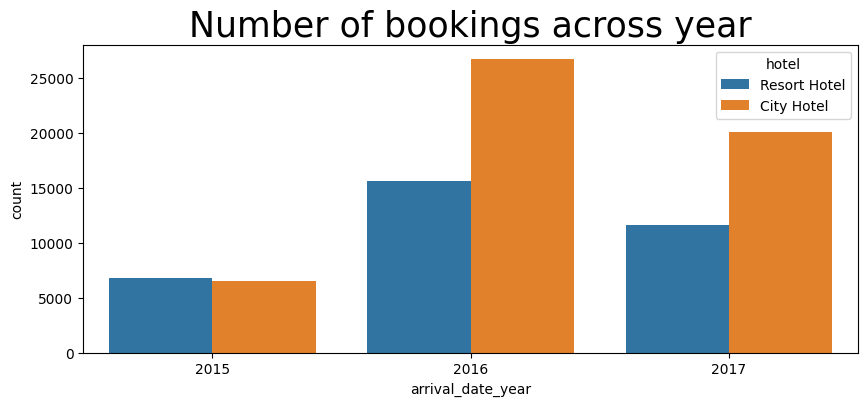

In [30]:
# Chart - 4 visualization code
# Plotting with countplot
plt.figure(figsize=(10,4))
sns.countplot(x=data['arrival_date_year'], hue=data['hotel'])
plt.title("Number of bookings across year", fontsize = 25)
plt.show()

Chart - 5

Which month has the most bookings in each hotel type?

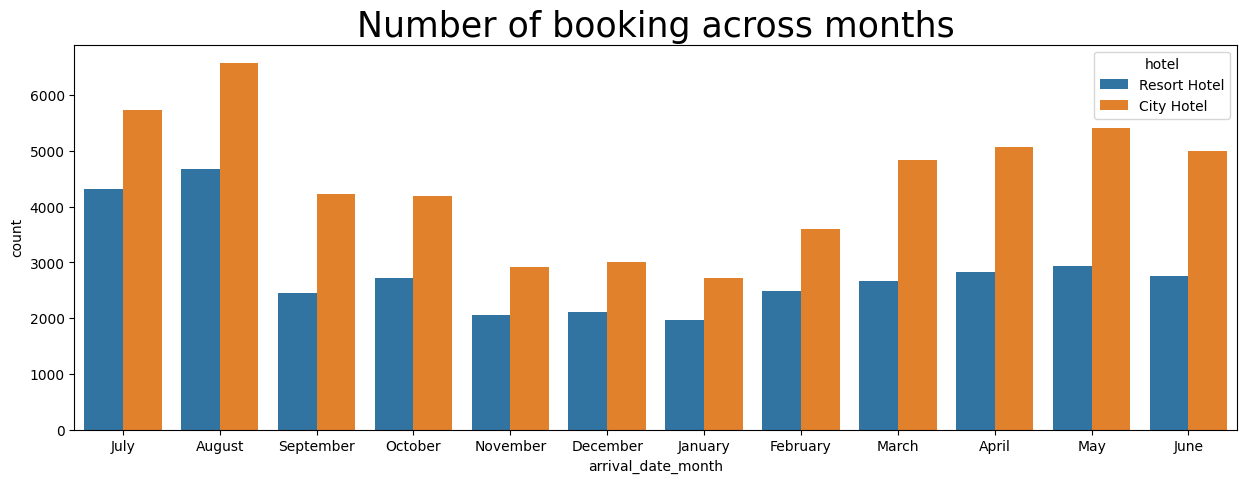

In [31]:
# Chart - 5 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=data['arrival_date_month'], hue=data['hotel'])
plt.title("Number of booking across months", fontsize = 25)
plt.show()

Chart - 6

From which country most guests come?

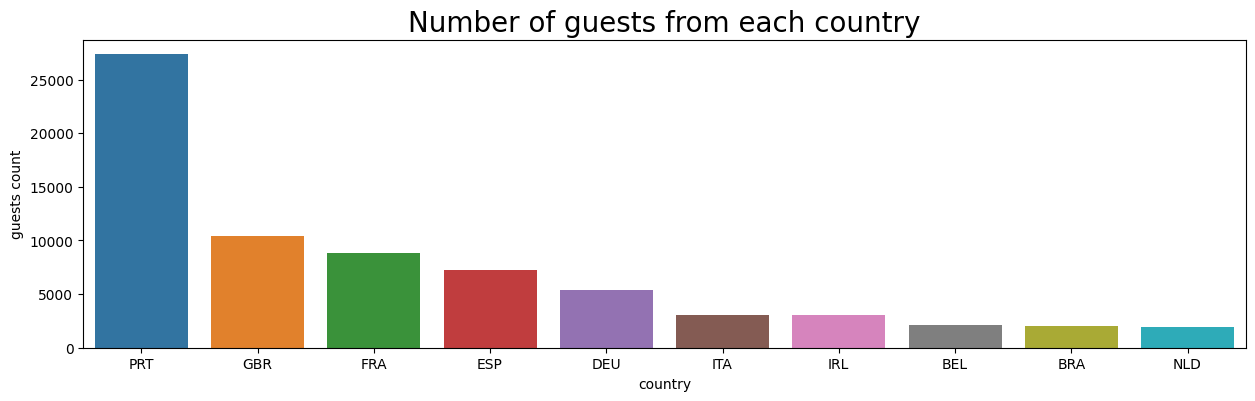

In [32]:
# Chart - 6 visualization code
# Counting number of guests from various countries and changing column names
country_df = data['country'].value_counts().reset_index().rename(columns={'index': 'country', 'count': 'guests count'})[:10]

# Visualising the values on a bar chart
# Setting the graph size
plt.figure(figsize=(15,4))
sns.barplot(x=country_df['country'], y=country_df['guests count'])
plt.title('Number of guests from each country', fontsize = 20)
plt.show()

Chart - 7

Which distribution channel is most used in booking?

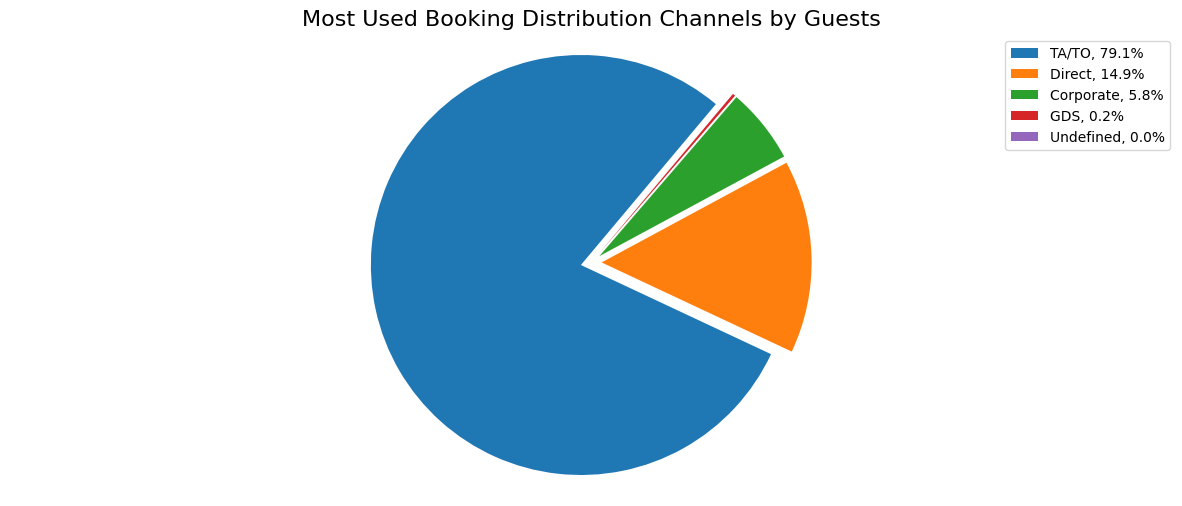

In [33]:
# Visualization code
# Creating a dataset of distribution channel name and count
dist_df = data['distribution_channel'].value_counts().reset_index()

# Renaming the columns to approproiate names
dist_df = dist_df.rename(columns={'count': 'channel count'})

# Creating a explode data
my_explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Adding percentage columns to the distribution channel_df
dist_df['percentage'] = round(dist_df['channel count']*100/data.shape[0], 1)

# Deciding the figure size
plt.figure(figsize=(15,6))

# Ploting the chart values
plt.pie(dist_df['channel count'], labels = None, explode = my_explode, startangle = 50)

# Adding legends with percentage using list comprehension
labels = [f'{l}, {s}%' for l, s in zip(dist_df['distribution_channel'].value_counts().index.tolist(), dist_df['percentage'].values.tolist())]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

# Setting the chart title
plt.title('Most Used Booking Distribution Channels by Guests', fontsize = 16)

# Show the chart
plt.axis('equal')
plt.show()

Chart - 8

Which room type is most preferred by guests?

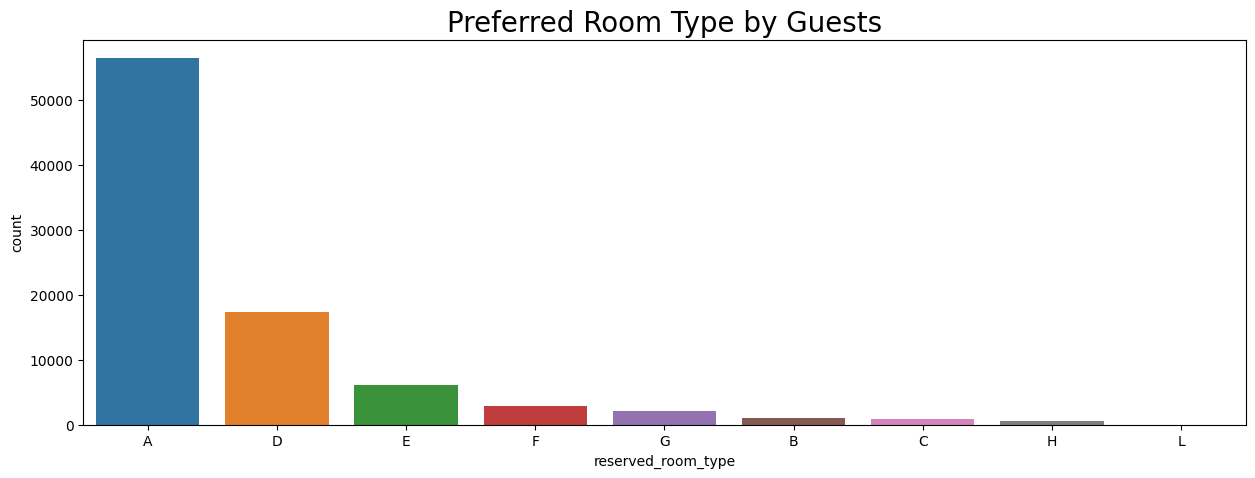

In [34]:
# Chart - 8 visualization code
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values in chart
sns.countplot(x=data['reserved_room_type'], order=data['reserved_room_type'].value_counts().index)

# Setting the title
plt.title('Preferred Room Type by Guests', fontsize = 20)

# Show the chart
plt.show()

Chart - 9

Which room type is most assigned?

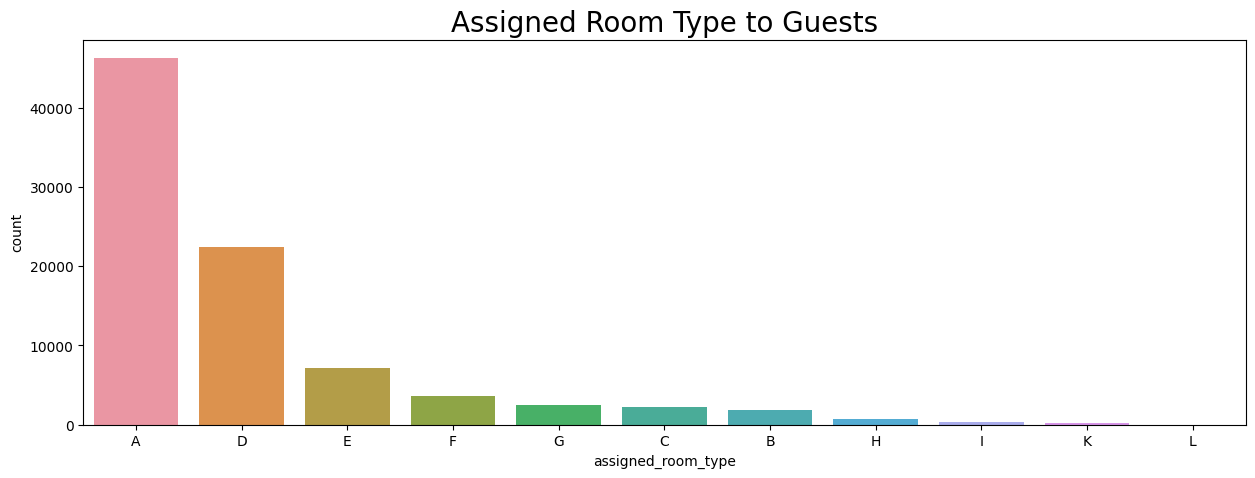

In [35]:
# Chart - 9 visualization code
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values
sns.countplot(x=data['assigned_room_type'], order = data['assigned_room_type'].value_counts().index)

# Setting the title
plt.title('Assigned Room Type to Guests', fontsize = 20)

# Show the chart
plt.show()

Chart - 10

Top 5 agents in terms of most bookings?

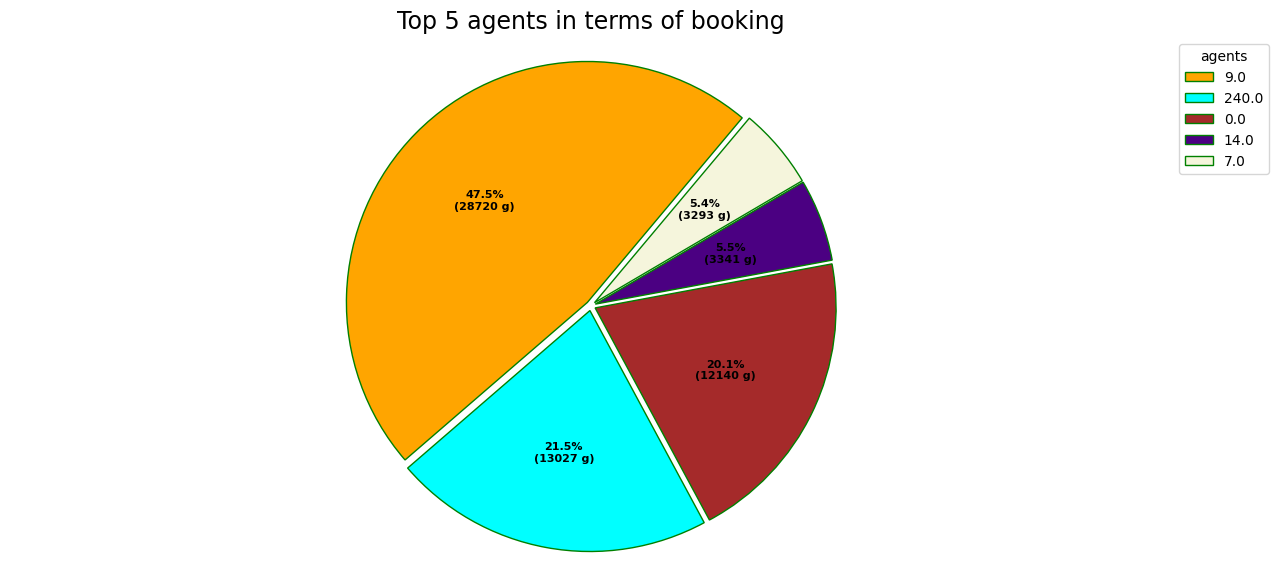

In [36]:
# Chart - 10 visualization code
# Creating a dataset by grouping by agent column and it's count
agents = data.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count':'Booking Count'}).sort_values(by = 'Booking Count', ascending = False)

# Extracting top 5 agents by booking count
top_5 = agents[:5]

# Explorsion
explode = (0.02, 0.02, 0.02, 0.02, 0.02)

# Colors
colors = ("orange", "cyan", "brown", "indigo", "beige")

# Wedge properties
wp = {'linewidth' : 1, 'edgecolor' : "green"}

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Plotting the values
fig, ax = plt.subplots(figsize=(15,7))
wedges, texts, autotexts = ax.pie(top_5['Booking Count'],
                                  autopct = lambda pct: func(pct, top_5['Booking Count']),
                                  explode = explode,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 50,
                                  wedgeprops = wp)

# Adding legend
ax.legend(wedges, top_5['agent'],
          title = "agents",
          loc = "upper left",
          bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight = "bold")
ax.set_title("Top 5 agents in terms of booking", fontsize = 17)

# Show chart
plt.axis('equal')
plt.show()

Chart - 11

What is the percentage of repeated guests?

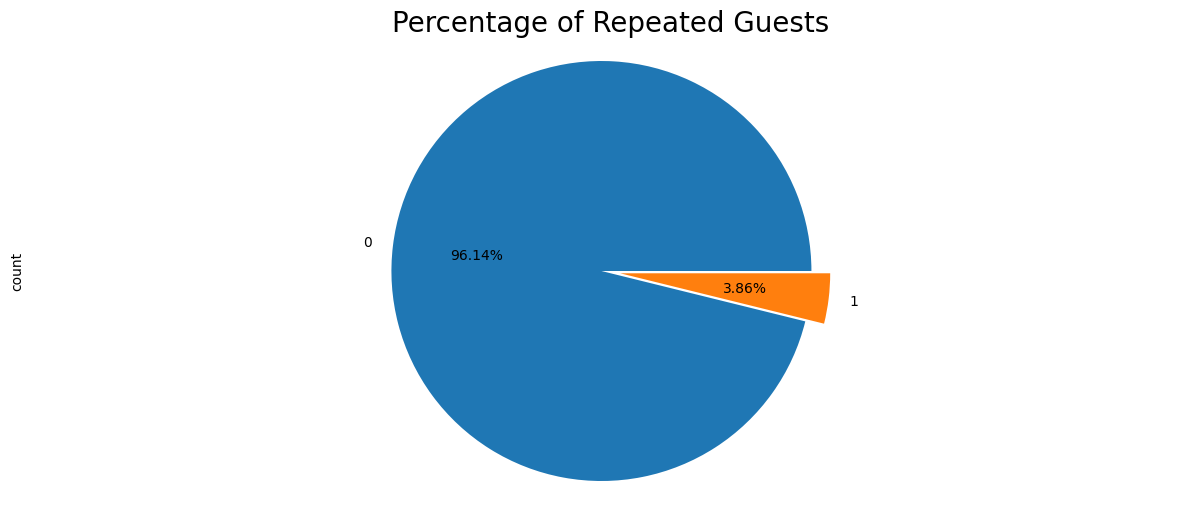

In [37]:
# Chart - 11 visualization code
# Creating a variable containing guests with their repeated counts
rep_guests = data['is_repeated_guest'].value_counts()

# Plotting the values in a pie chart
rep_guests.plot.pie(autopct='%1.2f%%', explode=(0.00,0.09), figsize=(15,6), shadow=False)

# Setting the title
plt.title('Percentage of Repeated Guests', fontsize = 20)

# Setting the chart in centre
plt.axis('equal')

# Show the chart
plt.show()

Chart - 12

Which customer type has the most booking?

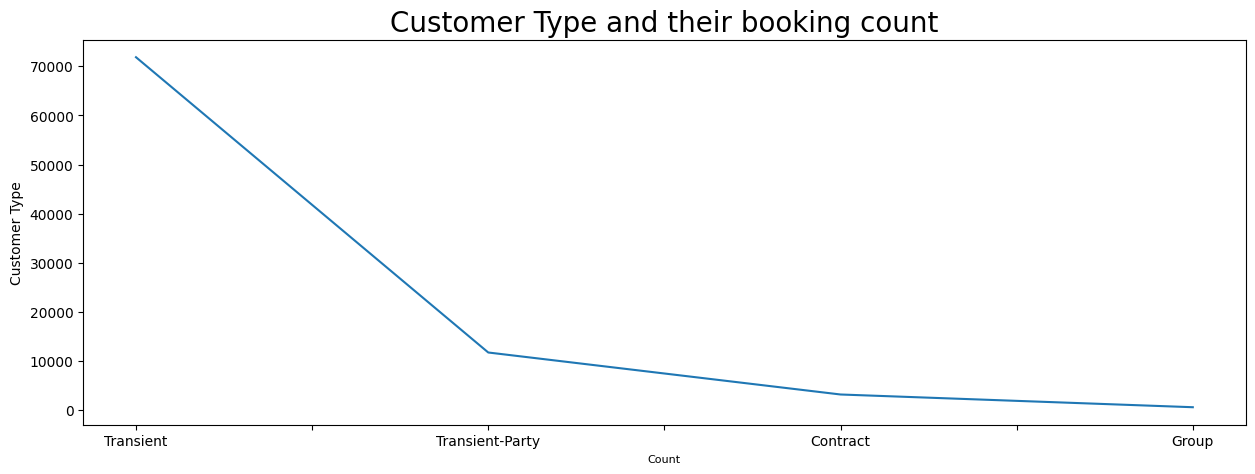

In [38]:
# Chart - 12 visualization code
cust_type = data['customer_type'].value_counts()

# Plotting the values in a line chart
cust_type.plot(figsize=(15,5))

# Setting the x label, y label and title
plt.xlabel('Count', fontsize = 8)
plt.ylabel('Customer Type', fontsize = 10)
plt.title('Customer Type and their booking count', fontsize = 20)

# Show the chart
plt.show()

Chart - 13

Which Market Segment has the most booking?

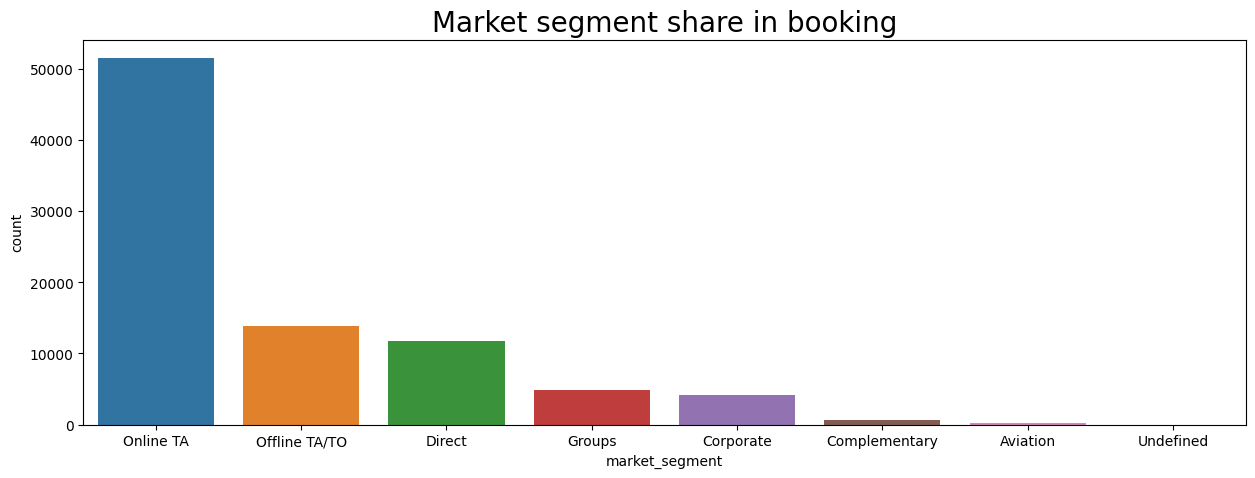

In [39]:
# Chart - 13 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=data['market_segment'], order = data['market_segment'].value_counts().index)
plt.title('Market segment share in booking', fontsize = 20)
plt.show()

Chart - 14

Which deposit type is most preferred?

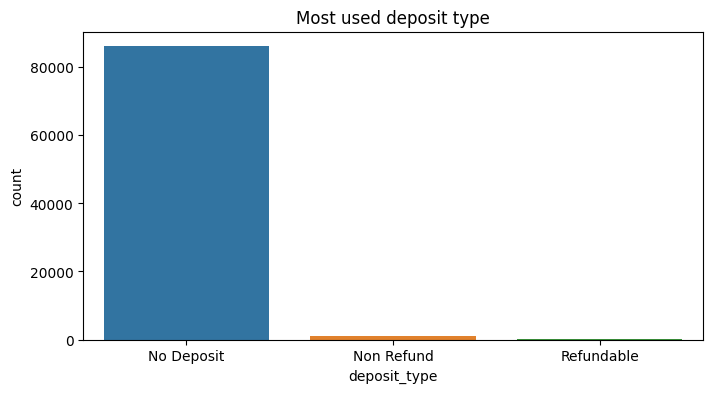

In [40]:
# Chart - 14 visualization code
# Showing each deposit type
deposit = data['deposit_type'].value_counts().index

# Setting the chart size
plt.figure(figsize=(8,4))

# Plotting the values
sns.countplot(x=data['deposit_type'], order=deposit)
plt.title('Most used deposit type')
plt.show()

Creating a Pie chart also for the above problem statement as Bar chart can't show the proporations of categorical data.

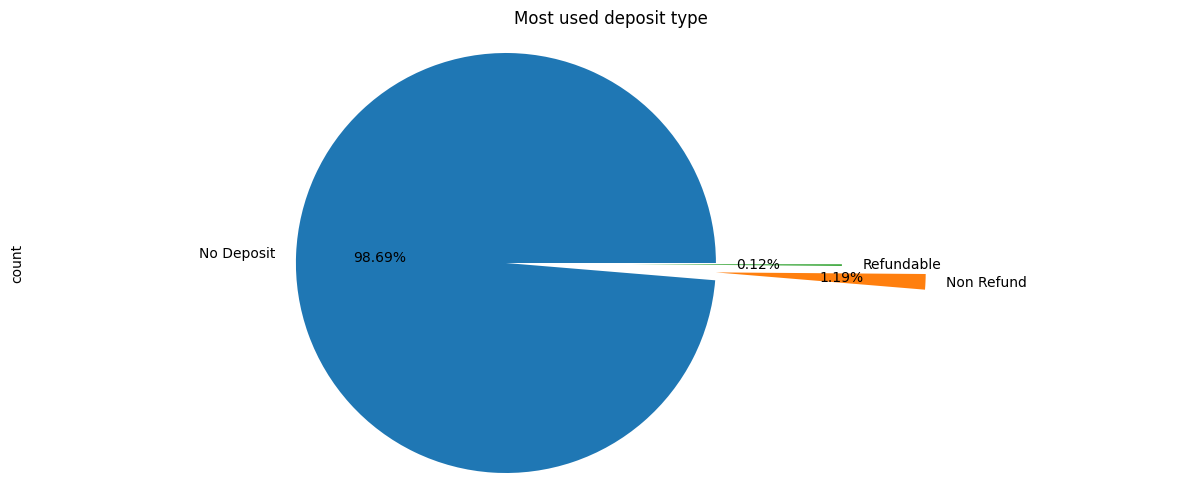

In [41]:
# Counting each deposit type
deposit = data['deposit_type'].value_counts()

# Plotting Values in a simple pie chart
#deposit.plot.pie(figsize=(9,7), autopct='%1.2f%%', shadow=True, fontsize=15, startangle=50)
deposit.plot.pie(autopct='%1.2f%%', explode = (0.1,0.9,0.5), figsize=(15,6), shadow=False)

# Setting the title
plt.title('Most used deposit type')
plt.axis('equal')
plt.show()

# Bivariate and Multivariate Analysis

Chart - 15

How long people stay in the hotel?

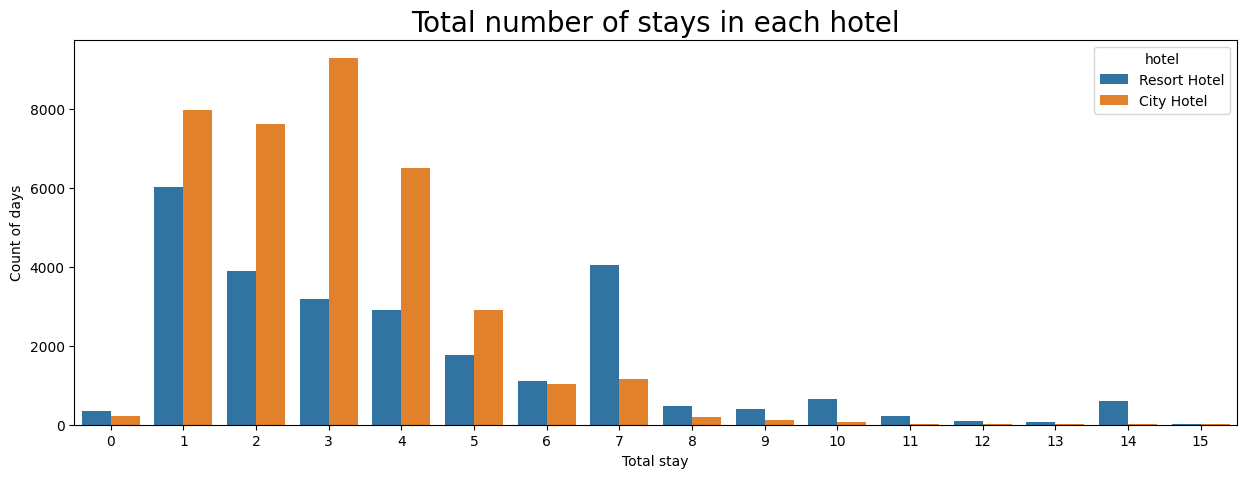

In [42]:
# Chart - 15 visualization code
# Creating a not cancelled dataframe
not_cancelled_df = data[data['is_canceled'] == 0]

# Creating a hotel stay dataframe
hotel_stay = not_cancelled_df[not_cancelled_df['total_stay'] <= 15]    # Visualizing pattern till 15 days stay

# Setting plot sizse and lotting barchat
plt.figure(figsize = (15,5))
sns.countplot(x=hotel_stay['total_stay'], hue=hotel_stay['hotel'])

# Adding the label of the chart
plt.title('Total number of stays in each hotel', fontsize = 20)
plt.xlabel('Total stay')
plt.ylabel('Count of days')
plt.show()

Chart - 16

Which hotel makes most revenue?

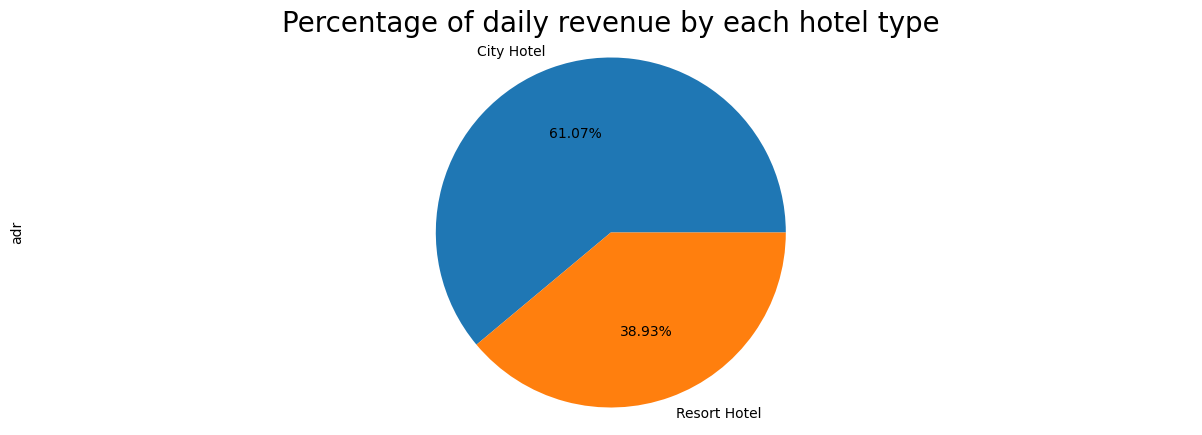

In [43]:
# Counting the revenue for each hotel type using groupby function
most_rev = data.groupby('hotel')['adr'].count()

# Plotting the values in a pie chart
most_rev.plot.pie(autopct='%1.2f%%', figsize=(15,5))

# Setting the title
plt.title('Percentage of daily revenue by each hotel type', fontsize = 20)
plt.axis('equal')

# Show the chart
plt.show()

Chart - 17

Which hotel has the longer waiting time?

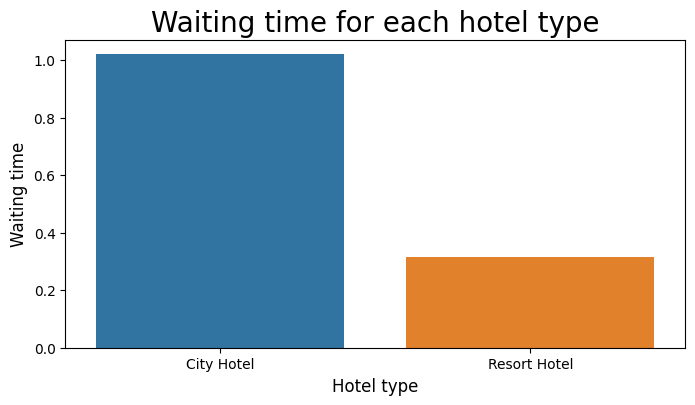

In [44]:
# Grouping by hotel and taking the mean of days in waiting list
waiting_time_df = data.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

# Setting the plot size
plt.figure(figsize=(8,4))

# Plotting the barchart
sns.barplot(x=waiting_time_df['hotel'], y=waiting_time_df['days_in_waiting_list'])

# Setting the labels
plt.xlabel('Hotel type', fontsize = 12)
plt.ylabel('Waiting time', fontsize = 12)
plt.title('Waiting time for each hotel type', fontsize = 20)

# Show chart
plt.show()

Chart - 18

Hotel with most repeated guests.

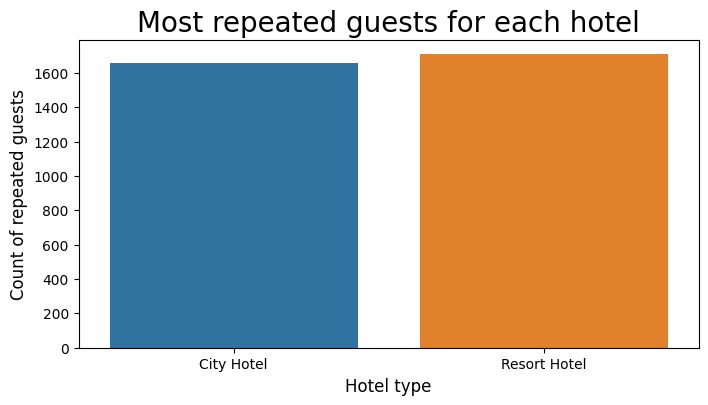

In [45]:
# Grouping hotel types on repeated guests
rep_guest = data[data['is_repeated_guest'] == 1].groupby('hotel').size().reset_index()

# Renaming the column
rep_guest = rep_guest.rename(columns={0:'number_of_repeated_guests'})

# Setting the chart size
plt.figure(figsize=(8,4))

# Plotting the values in a bar chart
sns.barplot(x=rep_guest['hotel'], y=rep_guest['number_of_repeated_guests'])

# Setting the labels and title
plt.xlabel('Hotel type', fontsize = 12)
plt.ylabel('Count of repeated guests', fontsize = 12)
plt.title('Most repeated guests for each hotel', fontsize = 20)

# Show Chart
plt.show()

Chart - 19

What is the adr across different months?

In [46]:
# Grouping arrival_month and hotel on mean of adr
bookings_months = data.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Creating a month list to order the months in ascending
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dataset of months, hotel and their adr
bookings_months['arrival_date_month'] = pd.Categorical(bookings_months['arrival_date_month'], categories=months, ordered=True)

# Setting the months
bookings_months = bookings_months.sort_values('arrival_date_month')
bookings_months

arrival_date_month         hotel         adr
8             January    City Hotel   85.269875
9             January  Resort Hotel   49.181693
6            February    City Hotel   89.266427
7            February  Resort Hotel   54.102809
15              March  Resort Hotel   57.590889
14              March    City Hotel   95.193911
0               April    City Hotel  117.314134
1               April  Resort Hotel   79.283805
17                May  Resort Hotel   80.551101
16                May    City Hotel  128.055724
13               June  Resort Hotel  112.380859
12               June    City Hotel  123.996416
11               July  Resort Hotel  156.166914
10               July    City Hotel  120.318314
3              August  Resort Hotel  187.566659
2              August    City Hotel  125.148662
22          September    City Hotel  118.764693
23          September  Resort Hotel  100.892331
20            October    City Hotel  107.585401
21            October  Resort Hotel   63.723065
18           November    City Hotel   89.882912
19           November  Resort Hotel   48.871043
5            December  Resort Hotel   65.488671
4            December    City Hotel   93.204767

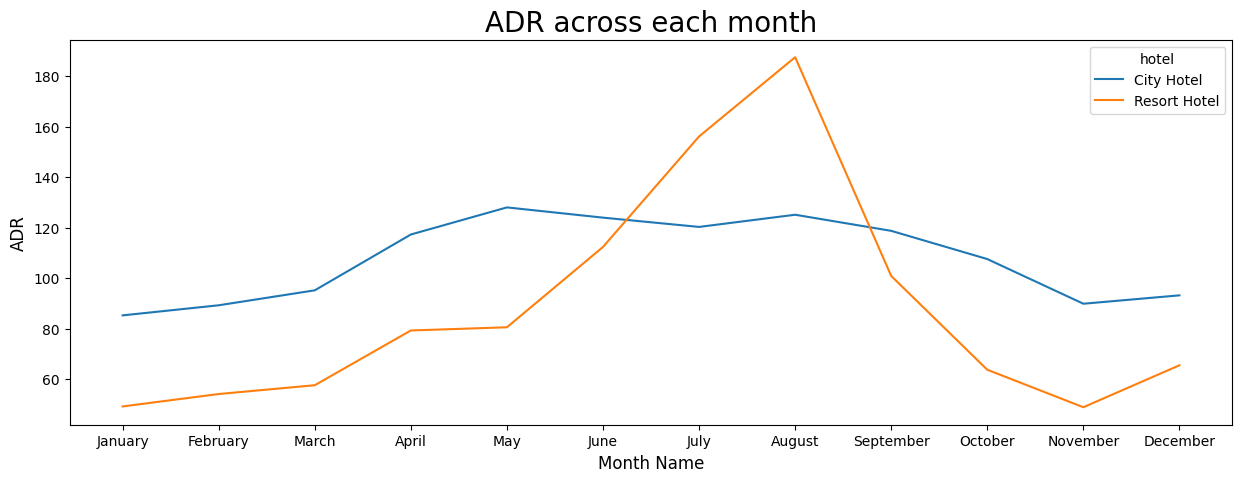

In [47]:
# Setting the chart size
plt.figure(figsize=(15,5))

# Plotting the values in a line chart
sns.lineplot(x=bookings_months['arrival_date_month'], y=bookings_months['adr'], hue=bookings_months['hotel'])

# Setting the labels and title
plt.title('ADR across each month', fontsize = 20)
plt.xlabel('Month Name', fontsize = 12)
plt.ylabel('ADR', fontsize = 12)

# Show chart
plt.show()

Chart - 20

Which distribution channel has highest adr?

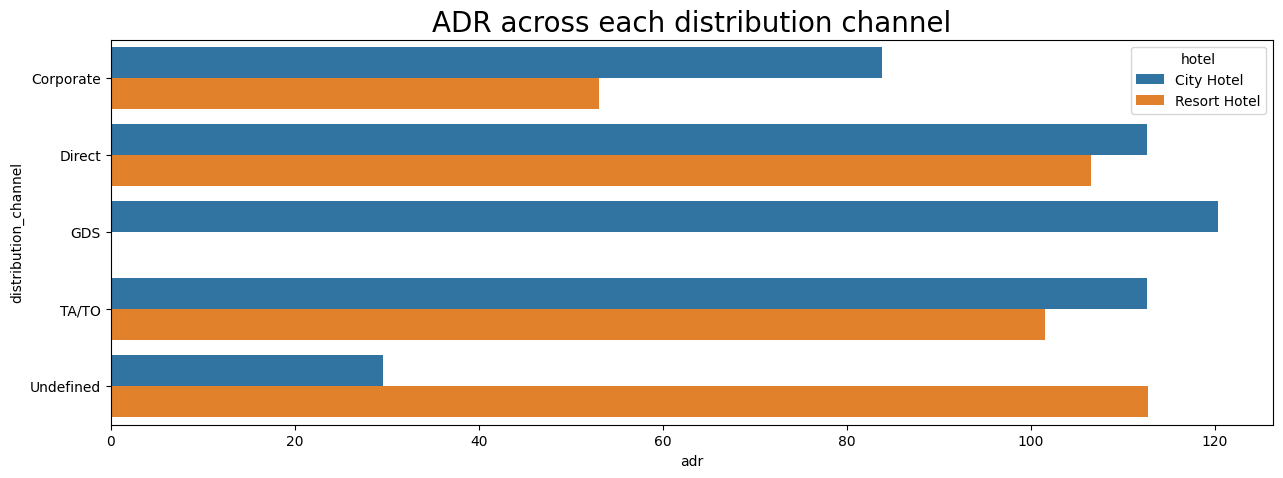

In [48]:
# Grouping dist_channel and hotels on their adr
dist_channel_adr = data.groupby(['distribution_channel', 'hotel'])['adr'].mean().reset_index()

# Setting the figure size
plt.figure(figsize=(15,5))

# Creating a borizontal bar chart
sns.barplot(x='adr', y='distribution_channel', data=dist_channel_adr, hue='hotel')

# Setting the title
plt.title('ADR across each distribution channel', fontsize = 20)

# Show chart
plt.show()

Chart - 21 - Corrlation Heatmap

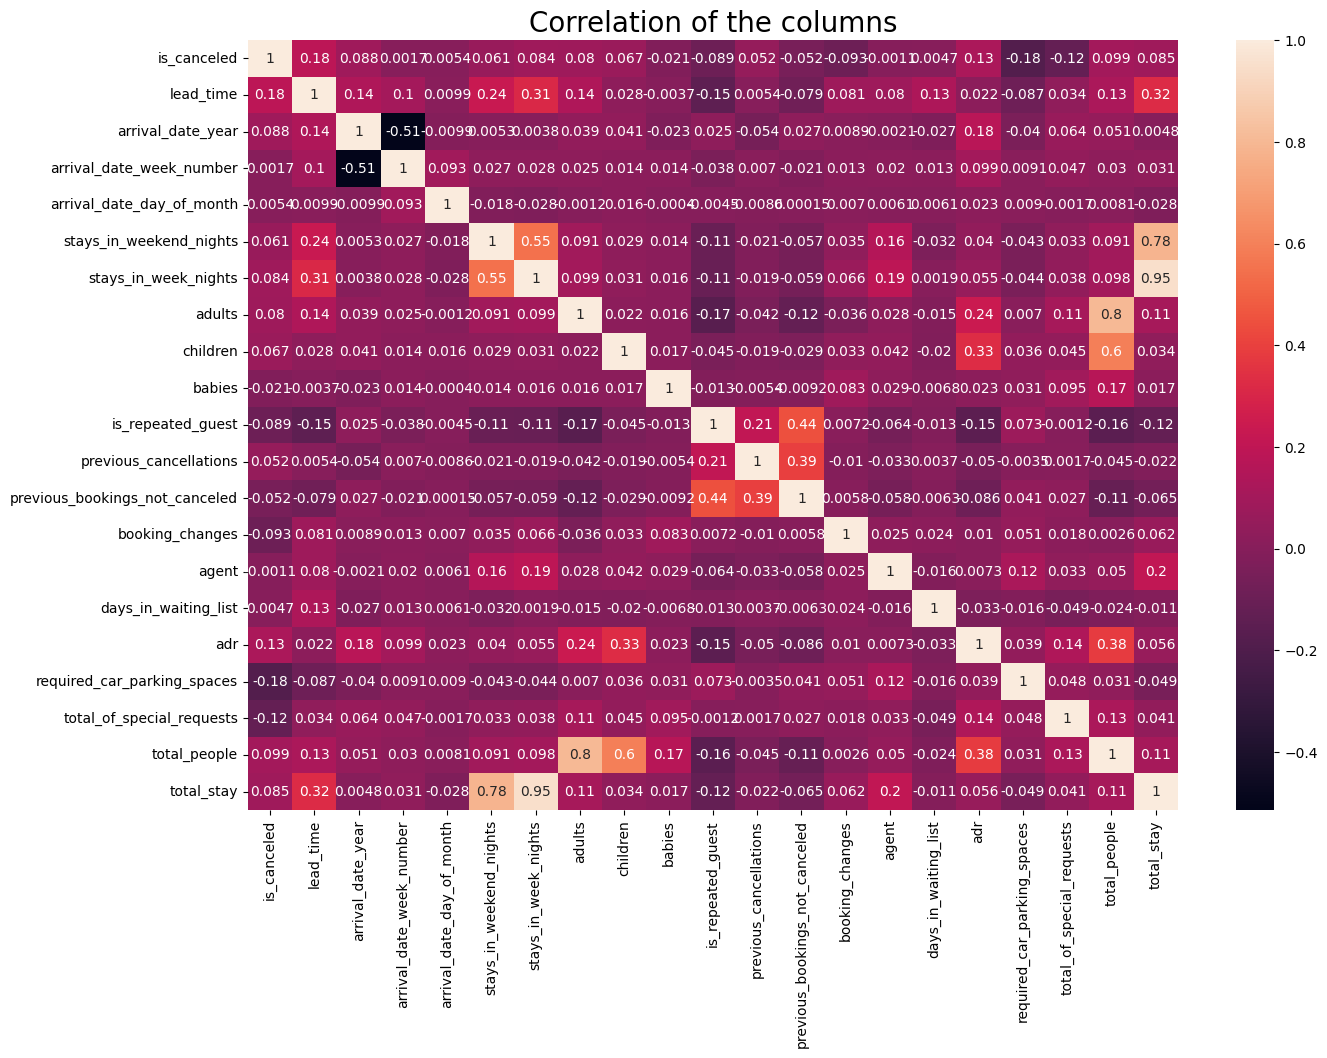

In [49]:
# Correlation Heatmap visualization code
# Setting the chart size
plt.figure(figsize=(15,10))

# Creating heatmap to see correlation of each columns
sns.heatmap(data.corr(numeric_only=True), annot=True)    # Setting the numeric only columns to True to avoid warning

# Setting the title
plt.title('Correlation of the columns', fontsize = 20)

# Show heatmap
plt.show()

Chart - 22 - Pair Plot

C:\Users\foon_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



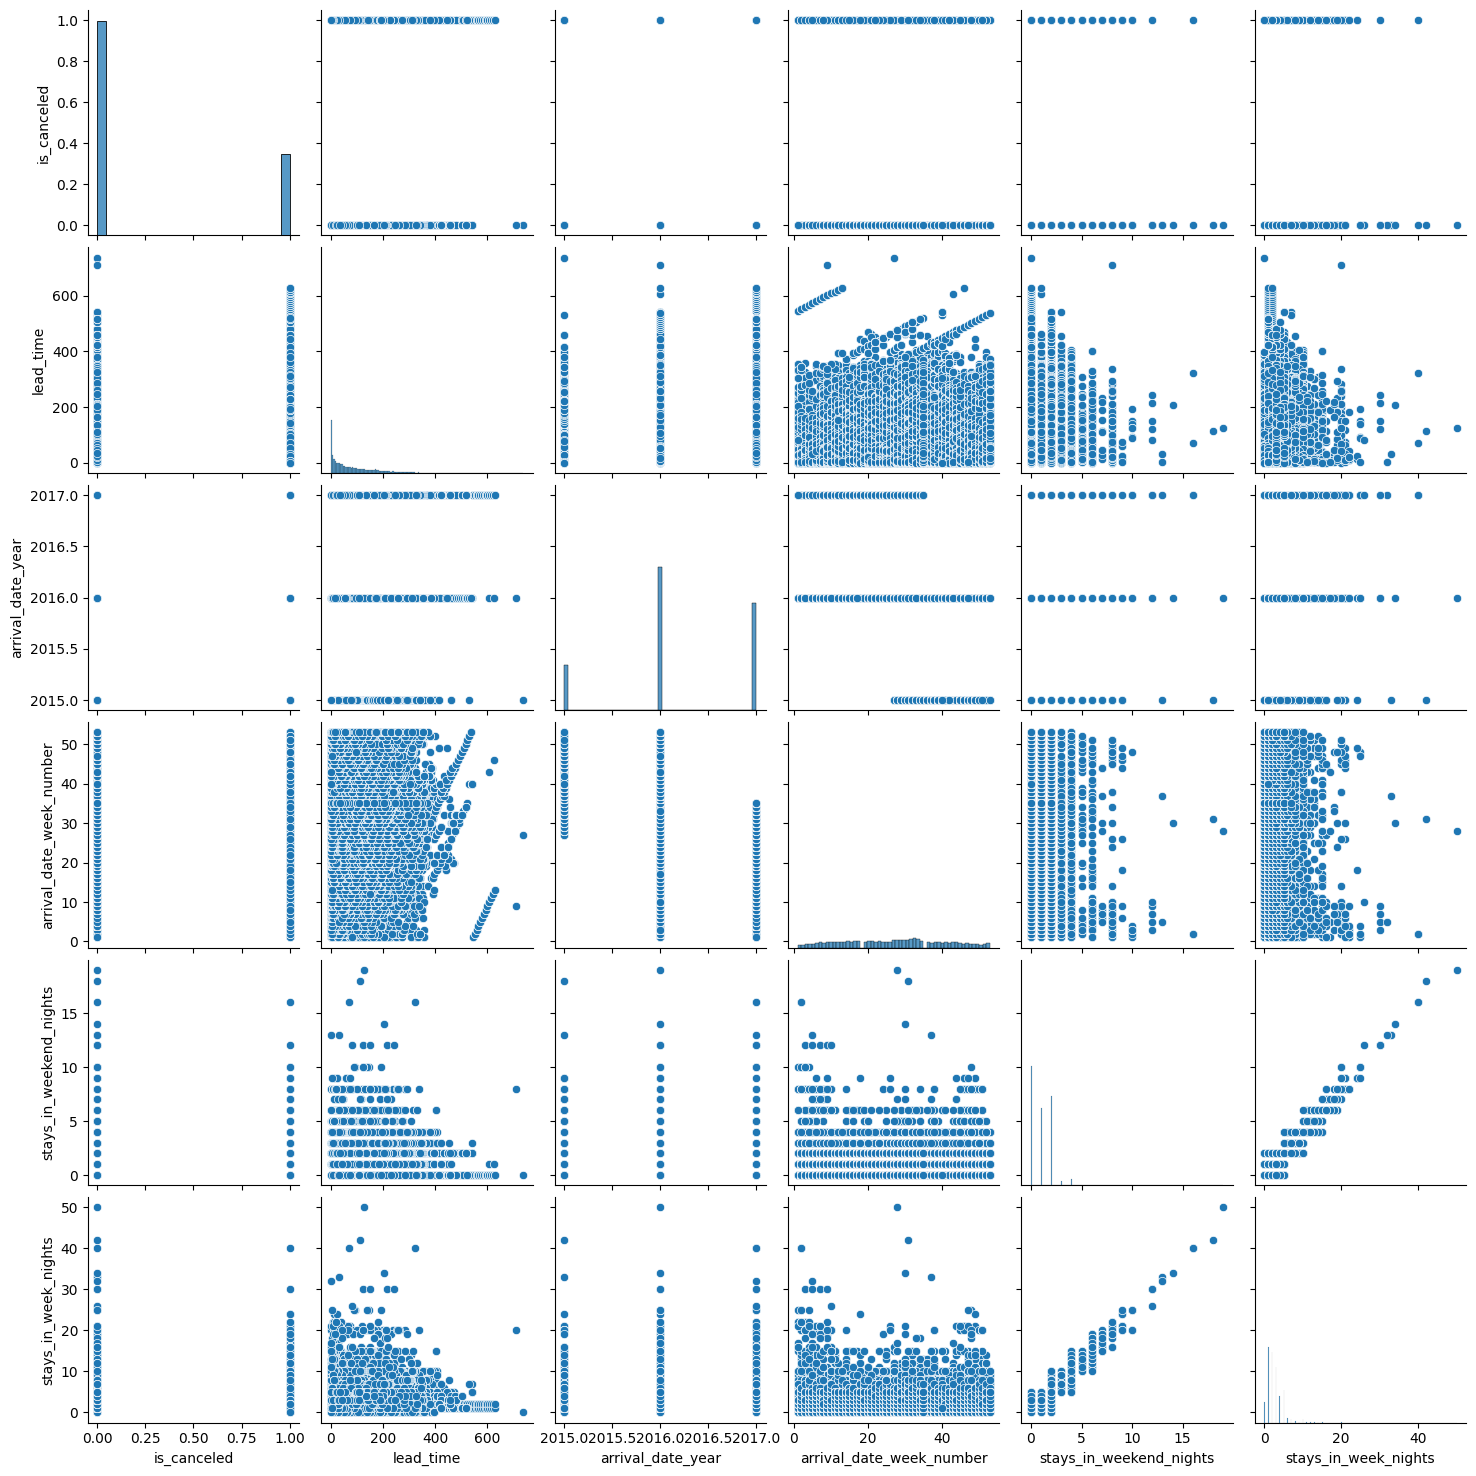

In [50]:
# Pair Plot visualization code
#sns.pairplot(data)
sns.pairplot(data, vars=['is_canceled', 'lead_time', 'arrival_date_year', 
                         'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights'])
plt.show()

# 5. Solution to Business Objective

What do you suggest to the client to achieve Business Objective?

Explain Briefly.

To achieve the business objective, the following recommendations are suggested:

1. Stakeholders can offer discounts on City Hotel to increase bookings as Resort Hotel is more preferred.
2. To reduce the number of cancellations, the hotel can offer loyalty discounts to guests who do not cancel their booking.
3. To avoid delays, the hotel can maintain raw materials for BB type meal in advance as it is the most preferred meal.
4. To decrease waiting time, the hotel should increase the number of rooms in City Hotel.
5. To get more bookings from other market segments, the hotel could run some offers as TA has the most number of bookings over other market segments.
6. To cater to guest preferences, the hotel should increase the number of A type rooms as they are the most preferred.
7. To increase the number of repeated guests, the hotel needs to identify and fix the issues that are causing dissatisfaction among guests.
8. As the waiting time period for City Hotel is high compared to Resort Hotel, it is recommended that the hotel take measures to manage the higher demand.
9. As the optimal stay in both types of hotels is less than seven days, the hotel needs to take actions to improve their performance to cater to guests who usually stay for a week.
10. The maximum number of guests were from Portugal.

# Conclusion

In order to achieve the business objective, I would suggest the client to consider the following strategies:

1. Dynamic Pricing: Implementing dynamic pricing can help the client optimize revenue by adjusting prices based on factors such as demand, seasonality, and availability.

2. Attractive Offers and Packages: Introduce enticing offers and packages to attract new customers. This can include discounted rates, complimentary services, or bundled deals.

3. Loyalty Points Program: To retain existing customers and encourage repeat bookings, the client can introduce a loyalty points program. Customers can accumulate points for each stay, which can be redeemed for discounts or additional benefits in their future bookings.

4. Enhanced Amenities: Providing additional amenities such as parking spaces, kids corner, and free internet connection can enhance the overall guest experience and increase the number of bookings.

These strategies can help the client optimize revenue, attract new customers, retain existing ones, and create a positive brand image. It’s important to analyze the target market and competition to tailor these strategies accordingly.

Hurrah! You have successfully completed your EDA Capstore Project !!!

# Data Analysis Mastery: Step-by-Step Portfolio Project Guide

Q1: Is our hotel revenue growing by year?

In our dataset we don’t have revenue, but we do have adr (Average Daily Rate) and total_stay. So, we will create a new column revenue by using the data of these two columns as follows.

In [51]:
data['revenue'] = data['adr'] * data['total_stay']

The revenue column is here.

In [52]:
data['revenue']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
119385     672.98
119386    1578.01
119387    1103.97
119388     730.80
119389    1360.80
Name: revenue, Length: 87230, dtype: float64

Let's bring another column 'arrival_date_year' from the data then calculate the sum of revenue while grouping the data by year.

In [53]:
data.groupby(['arrival_date_year'])['revenue'].sum().reset_index()

arrival_date_year      revenue
0               2015   4885499.06
1               2016  15284379.86
2               2017  14281712.21

Now, in the above table, we can see that the revenue increased from 2015 to 2016 but then decreased again in 2017.

We can also determine the revenue trend by hotel type by grouping the data by hotel and then seeing which hotels have generated the most revenue.

In [54]:
data.groupby(['arrival_date_year', 'hotel'])['revenue'].sum().reset_index()

arrival_date_year         hotel     revenue
0               2015    City Hotel  1764649.57
1               2015  Resort Hotel  3120849.49
2               2016    City Hotel  8984795.39
3               2016  Resort Hotel  6299584.47
4               2017    City Hotel  8015588.40
5               2017  Resort Hotel  6266123.81

Q2: Should we increase our parking lot size?
(We want to understand if there is a trend is guest with personal cars.)

To answer this question, we will focus on the 'required_car_parking_spaces' column and number of guests staying in the hotel. So, let's do it by applying the following two statements.

In [55]:
q2df = data.groupby(['arrival_date_year', 'hotel'])[['required_car_parking_spaces', 'total_stay']].sum()
q2df

required_car_parking_spaces  total_stay
arrival_date_year hotel                                                
2015              City Hotel                            198       19290
                  Resort Hotel                         1133       31020
2016              City Hotel                           1178       82875
                  Resort Hotel                         2642       65658
2017              City Hotel                            521       65219
                  Resort Hotel                         1682       52455

In [56]:
q2df['car_parking_percentage'] = (q2df['required_car_parking_spaces']/q2df['total_stay']).round(3)
q2df

required_car_parking_spaces  total_stay  \
arrival_date_year hotel                                                   
2015              City Hotel                            198       19290   
                  Resort Hotel                         1133       31020   
2016              City Hotel                           1178       82875   
                  Resort Hotel                         2642       65658   
2017              City Hotel                            521       65219   
                  Resort Hotel                         1682       52455   

                                car_parking_percentage  
arrival_date_year hotel                                 
2015              City Hotel                     0.010  
                  Resort Hotel                   0.037  
2016              City Hotel                     0.014  
                  Resort Hotel                   0.040  
2017              City Hotel                     0.008  
                  Resort Hotel                   0.032

In the above table, we can observe that we have enough space for parking. So, there is no need to increase our parking lot size.

Q3: What trends can we see in the data?
(Focus on average daily rate and guest to explore seasonality.)

We have created some visuals that show some possible trends. Here are a few of them (Revenue, ADR, Total Stay, Total People):

In [57]:
data2=data.groupby(['arrival_date_year'])[['revenue', 'adr', 'total_stay', 'total_people']].sum()
data2

revenue         adr  total_stay  total_people
arrival_date_year                                                   
2015                4885499.06  1226930.09       50310       25970.0
2016               15284379.86  4303105.84      148533       85420.0
2017               14281712.21  3761531.89      117674       65609.0

In [58]:
# Grouping arrival_month and hotel on mean of adr
bookings_months = data.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Creating a month list to order the months in ascending
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dataset of months, hotel and their adr
bookings_months['arrival_date_month'] = pd.Categorical(bookings_months['arrival_date_month'], categories=months, ordered=True)

# Setting the months
bookings_months = bookings_months.sort_values('arrival_date_month')
bookings_months

arrival_date_month         hotel         adr
8             January    City Hotel   85.269875
9             January  Resort Hotel   49.181693
6            February    City Hotel   89.266427
7            February  Resort Hotel   54.102809
15              March  Resort Hotel   57.590889
14              March    City Hotel   95.193911
0               April    City Hotel  117.314134
1               April  Resort Hotel   79.283805
17                May  Resort Hotel   80.551101
16                May    City Hotel  128.055724
13               June  Resort Hotel  112.380859
12               June    City Hotel  123.996416
11               July  Resort Hotel  156.166914
10               July    City Hotel  120.318314
3              August  Resort Hotel  187.566659
2              August    City Hotel  125.148662
22          September    City Hotel  118.764693
23          September  Resort Hotel  100.892331
20            October    City Hotel  107.585401
21            October  Resort Hotel   63.723065
18           November    City Hotel   89.882912
19           November  Resort Hotel   48.871043
5            December  Resort Hotel   65.488671
4            December    City Hotel   93.204767

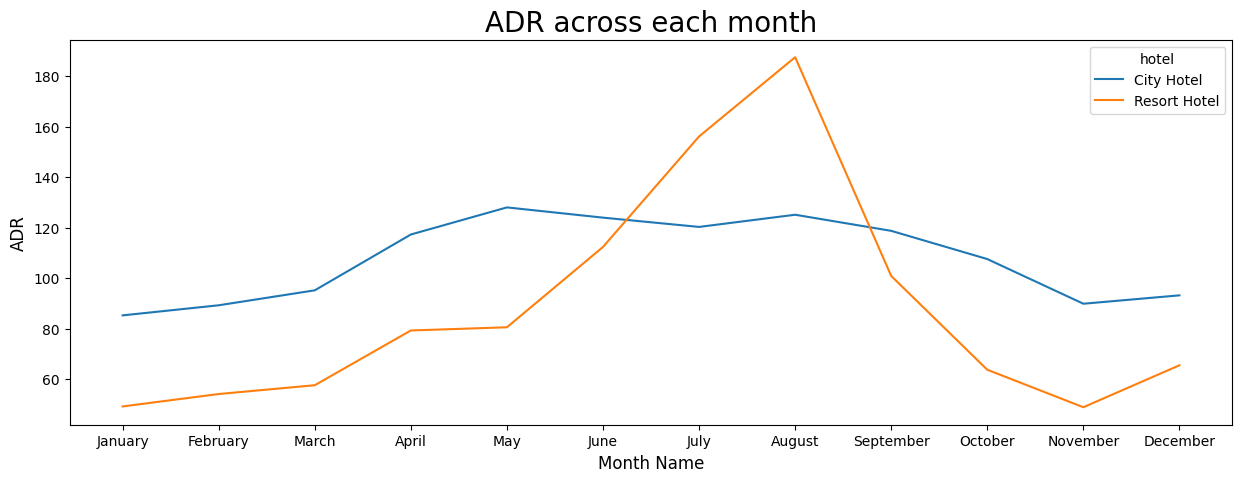

In [76]:
# Setting the chart size
plt.figure(figsize=(15,5))

# Plotting the values in a line chart
sns.lineplot(x=bookings_months['arrival_date_month'], y=bookings_months['adr'], hue=bookings_months['hotel'])

# Setting the labels and title
plt.title('ADR across each month', fontsize = 20)
plt.xlabel('Month Name', fontsize = 12)
plt.ylabel('ADR', fontsize = 12)

# Show chart
plt.show()